* ESTADISTICA

In [1]:
from collections import Counter
from nbimporter import NotebookLoader
import math

algebra = NotebookLoader().load_module('algebra_lineal')

def mean(x):
    return sum(x)/len(x)

def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n//2
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint-1
        hi = midpoint
        return(sorted_v[lo]+sorted_v(hi))/2

def quantile(x, p):
    p_index = int(p*len(x))
    return sorted(x)[p_index]

def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

def data_range(x):
    return max(x) - min(x)

def de_mean(x):
    #nos devuelve el 'mismo' vector, pero con media 0
    x_bar = mean(x)
    return [x_i-x_bar for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return algebra.sum_of_squares(deviations)/(n-1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

** Correlación

In [2]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
len(num_friends) == len(daily_minutes)

True

In [3]:
def covariance(x, y):
    n = len(x)
    return algebra.dot(de_mean(x), de_mean(y))/(n-1)

covariance(num_friends, daily_minutes)

22.425435139573064

Si la covarianza es positiva 'grande', entonces si x aumenta y aumenta.
Si la covarianza es negativa 'grande', entonces si x disminuye y aumenta.
Si la covarianza es cercana a zero o zero, entonces no hay relación.

In [4]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y)/(stdev_x * stdev_y)
    else:
        return 0
    
correlation(num_friends, daily_minutes)

0.24736957366478216

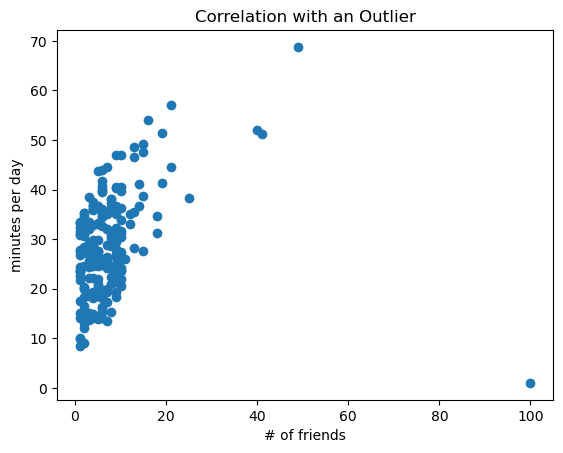

In [5]:
import matplotlib.pyplot as plt

plt.scatter(num_friends, daily_minutes)
plt.xlabel('# of friends')
plt.ylabel('minutes per day')
plt.title('Correlation with an Outlier')
plt.show()

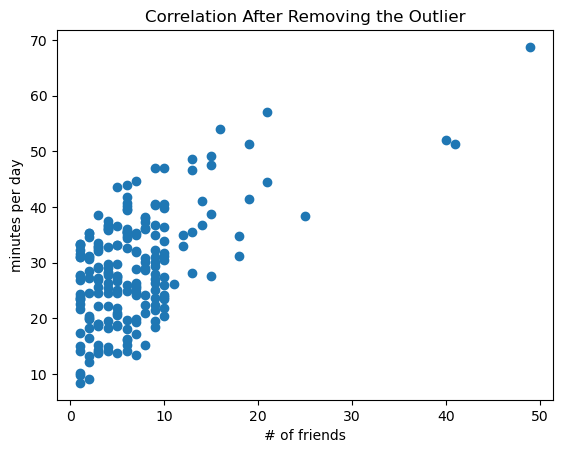

In [6]:
outlier = num_friends.index(100)
num_friends_good = [x for i, x in enumerate(num_friends)
                    if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes)
                      if i != outlier]

plt.scatter(num_friends_good, daily_minutes_good)
plt.xlabel('# of friends')
plt.ylabel('minutes per day')
plt.title('Correlation After Removing the Outlier')
plt.show()

* PROBABILIDAD

In [7]:
def uniform_pdf(x): #intervalo [0,1]
    if x >= 0 and x <= 1:
        return 1
    else:
        return 0
uniform_pdf(0.4)

def uniform_cdf(x):
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

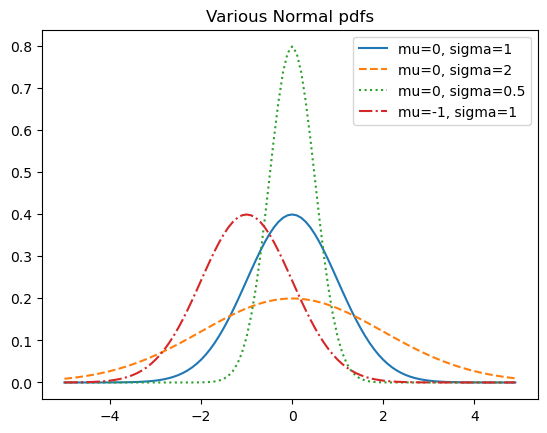

In [8]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

xs = [x/10 for x in range(-50,50)]
plt.plot(xs, [normal_pdf(x) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title('Various Normal pdfs')
plt.show()

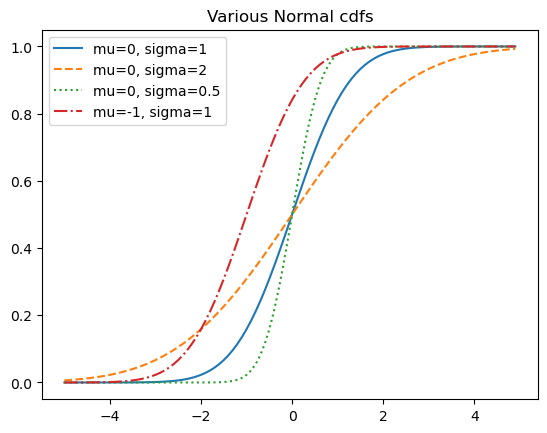

In [9]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x/10 for x in range(-50,50)]
plt.plot(xs, [normal_cdf(x) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title('Various Normal cdfs')
plt.show()

In [10]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10, 0
    hi_z, hi_p = 10, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z   

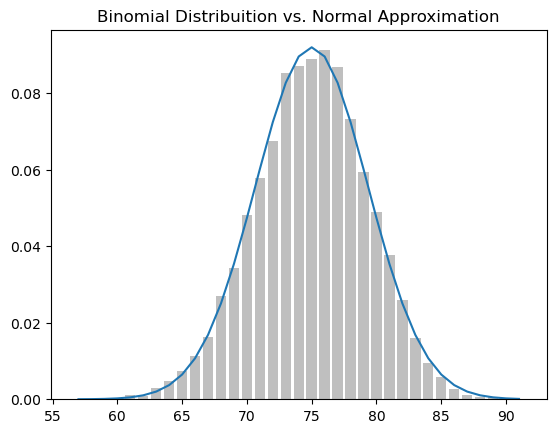

In [11]:
import random

def Bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(Bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    
    data = [binomial(n, p) for _ in range(num_points)]
    
    #usamos un grafico de barras para mostrar la binomial
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()],
            [value / num_points for value in histogram.values()],
            0.8, color = '0.75')
    
    mu = p*n
    sigma = math.sqrt(n*p*(1-p))
    
    xs = range(min(data), max(data)+1)
    ys = [normal_cdf(i+0.5, mu, sigma) - normal_cdf(i-0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title('Binomial Distribuition vs. Normal Approximation')
    plt.show()
    
make_hist(0.75, 100, 10000)

* Hypothesis and Inference

In [12]:
def normal_approximation_to_binomial(n, p):
    mu = p*n
    sigma = math.sqrt(p*(1-p)*n)
    return mu, sigma

normal_probability_below = normal_cdf

def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)

def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)

In [13]:
def normal_upper_bound(probability, mu=0, sigma=1):
    """P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability, mu=0, sigma=1):
    """P(Z >= z) = probability"""
    return inverse_normal_cdf(1-probability, mu, sigma)

def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """P(a <= X <= b) = probability"""
    tail_probability = (1-probability)/2
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    return lower_bound, upper_bound

def normal_two_sided_bounds2(probability, mu=0, sigma=1):
    """P(-z <= Z <= z) = probability"""
    tail_probability = (1+probability)/2
    upper_bound = normal_upper_bound(tail_probability, 0, 1)
    lower_bound = -upper_bound
    return lower_bound*sigma+mu, upper_bound*sigma+mu

mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)

normal_two_sided_bounds(0.95, mu_0, sigma_0)


(469.01026640487555, 530.9897335951244)

In [14]:
normal_two_sided_bounds2(0.95, mu_0, sigma_0)

(469.01026640487555, 530.9897335951244)

In [16]:
# intervalo del 95% de confianza asumiendo que p = 0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)

# calculamos las verdaderas mu y sigma, que es con p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)

# el error de tipo 2 significa que no rechazamos H_0 todo y ser esta falsa.
# esto es que X aún esté en el intervalo de confianza anterior
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1-type_2_probability
power

0.886548001295367

In [17]:
# comprobamos ahora con la H_0: p <= 0.5
hi = normal_upper_bound(0.95, mu_0, sigma_0)
type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1-type_2_probability
power

0.9363794803307173

In [18]:
def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        return 2*normal_probability_above(x, mu, sigma)
    else:
        return 2*normal_probability_below(x, mu, sigma)
    
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598835

El p-valor, a grosso modo, es la probabilidad de haber visto un valor extremo, a pesar de hipoteticamente ser cierta H_0. Si esta probabilidad es muy muy baja, pero has visto el valor extremos, significa que algo falla, y por tanto, H_0 es falsa.

In [20]:
extreme_value_count = 0
for _ in range(10000):
    num_heads = sum(1 if random.random() < 0.5 else 0
                    for _ in range(1000))
    if num_heads >= 530 or num_heads <= 470:
        extreme_value_count += 1

print(extreme_value_count / 10000) 

0.0637


Como el p-valor es 6.37% que es mayor a nuestro 5% de 'desconfianza' (habíamos elegido un intervalo del 95%), no rechazamos la hipótesis nula.

In [21]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

#si vimos 525 caras, calculariamos:
upper_p_value(524.5, mu_0, sigma_0)

#si vimos 527 caras, calculariamos:
upper_p_value(526.5, mu_0, sigma_0)

0.04686839508859242